<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


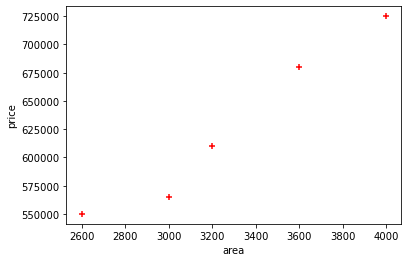

In [4]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [68]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [70]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [8]:
reg.predict([[3300]])

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [13]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [11]:
reg.predict([[5000]])

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [19]:
area_df = pd.read_csv("areas.csv")
area_df.head(10)

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [20]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [21]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [22]:
area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442

In [23]:
# Solution Of Exercise

In [24]:
canda_df = pd.read_csv('canada_per_capita_income.csv')

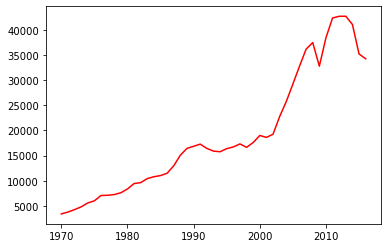

In [41]:
plt.plot(canda_df['year'],canda_df['per capita income (US$)'], color='r')


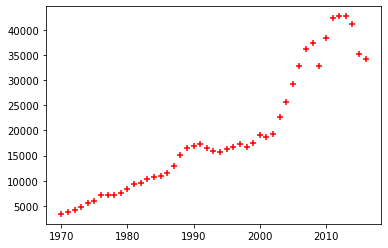

In [63]:
plt.scatter(canda_df.year, canda_df['per capita income (US$)'], color='r', marker="+")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0670fd340>,
 'caps': [<matplotlib.lines.Line2D at 0x1e067760790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e067753340>],
 'medians': [<matplotlib.lines.Line2D at 0x1e067760df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e067756ca0>],
 'means': []}

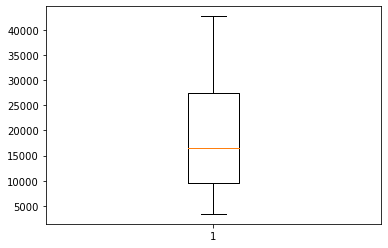

In [55]:
plt.boxplot(canda_df['per capita income (US$)'])

In [79]:
reg = linear_model.LinearRegression()


In [80]:
yearData = canda_df.drop('per capita income (US$)',axis='columns')
perCapita = canda_df['per capita income (US$)']


In [92]:
reg.fit(yearData,perCapita)

LinearRegression()

In [93]:
reg.predict([[2020]])

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [97]:
reg.coef_

array([828.46507522])

In [98]:
reg.intercept_

-1632210.7578554575

In [100]:
reg.coef_ * 2020 + reg.intercept_

array([41288.69409442])

# Regression model predict the per capita income fo canadian citizens in year 2020 is 41288.69409442 